# Street-Based Local Area

In [1]:
import community as community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx
import osmnx as ox

In [2]:
location_point = (53.4219, -2.9301)

In [3]:
# G = ox.graph_from_point(location_point, 500)
# G_projected = ox.project_graph(G)
# ox.save_graphml(G_projected, filename=f'{location_point}.graphml')

In [4]:
G = ox.load_graphml(f'{location_point}.graphml')

In [5]:
H = nx.Graph(G)
G = G.subgraph(H)

In [6]:
# compute the best partition
partition = community_louvain.best_partition(H)

In [7]:
import matplotlib.cm as cm
# get color map
cmap = cm.get_cmap('tab20c', max(partition.values()) + 1)

In [8]:
# color the nodes according to their partition
node_colors = [cmap.colors[p] for p in partition.values()]

In [9]:
edge_partition = [partition[edge[0]] \
                  if partition[edge[0]] == partition[edge[1]] \
                  else None for edge in G.subgraph(H).edges]

In [10]:
edge_colors = [cmap.colors[p] if p else 'k' for p in edge_partition]

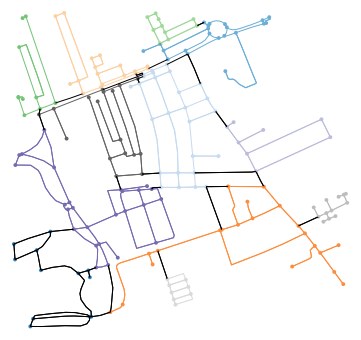

(<Figure size 447.287x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8027693ee0>)

In [11]:
ox.plot_graph(G.subgraph(H),\
              node_color=node_colors, \
              edge_color=edge_colors)